# **A1.3 Solución de problemas y selección de características**


### **Introducción**

En este reporte se analiza el conjunto de datos del archivo “A1.3 Calificaciones.csv”, el cual contiene información de estudiantes diseñada para identificar los factores que afectan su rendimiento académico final. El archivo se compone de 10 variables que abarcan datos demográficos, hábitos de estudio y resultados de evaluaciones previas. El objetivo es construir un modelo que prediga la nota final basándose en estos factores.


### **Exploración y contextualización de los datos**
En este archivo se encuentran las siguentes 3 clasificaciones de variables:

**Variables Cualitativas:**

- Escuela: Identifica la de escuela a la que pertenecen (GP o MS).

- Sexo: Género del estudiante (F o M).

- Internet: Acceso a internet en el hogar (yes o no).

**Variables Cuantitativas:**

- Edad: Rango de edad de los estudiantes.

- Reprobadas: Registro de asignaturas fallidas previamente.

- Faltas: Cantidad de faltas a clase.

- G1 y G2: Calificaciones del primer y segundo periodo. (Escala 0-20)

- G3: Calificación final del curso que el modelo busca predecir. (Escala 0-20)

**Variables Ordinales:**
- Horas de Estudio: Mide las horas de estudio semanales.
    - 1 - Menos de 2 horas
    - 2 - 2 a 5 horas
    - 3 - 5 a 10 horas
    - 4 - Más de 10 horas


### **Preparación y limpieza de los datos**

Para garantizar la credibilidad del modelo, se aplicó un proceso de limpieza y transformación orientado a cumplir con los supuestos estadísticos de linealidad y normalidad.

**Tratamiento de Variables cualitativas**

Dado que el modelo requiere entradas numéricas, las variables cualitativas fueron transformadas mediante codificación binaria. Este proceso evita que el modelo asigne órdenes de importancia arbitrarios.

Escuela, Sexo e Internet: Se convirtieron en variables binarias (0 y 1).
- Escuela: "GP" = 0 / "MS" = 1
- Internet: "no" = 0 / "yes" = 1
- Sexo: "M" = 0 / "F" = 1

**Tratamiento de Valores Faltantes (Huecos)**

Se realizó una búsqueda de valores nulos en las 10 columnas. No se detectaron huecos de información, por lo que se mantuvo la integridad de las filas originales sin necesidad de recurrir a técnicas de imputación por media o mediana.

**Manejo de Valores Atípicos (Outliers)**

Se aplicó un análisis de dispersión, detectando dos áreas críticas:

- Faltas: Se identificaron estudiantes con un número de faltas significativamente superior al promedio. Se decidió conservar los datos menores a 25 faltas, con el fin de evitar que valores extremos (posibles errores o casos de abandono total) distorsionen la tendencia del grupo.

- Calificaciones en Cero (G3): Se observaron registros donde la calificación final es 0, a pesar de tener parciales (G1 y G2) aprobatorios. Estos valores se trataron como "casos de deserción" o "no presentación al examen final". Para el modelo de regresión, estos ceros pueden afectar la pendiente, por lo que se recomienda su análisis por separado y se eliminaran en este caso que se busca predecir el rendimiento académico.

In [ ]:
import pandas as pd
from IPython.display import display_html, HTML

df = pd.read_csv('A1.3 Calificaciones.csv')
df_clean = df[(df['Faltas'] <= 20) & (df['G3'] > 0)].copy()

stats_antes = df[['Faltas', 'G3']].describe().round(2)
stats_despues = df_clean[['Faltas', 'G3']].describe().round(2)

html_antes = stats_antes.to_html()
html_despues = stats_despues.to_html()

html_final = f"""
<div style="display: flex; gap: 50px;">
    <div>
        <h3>Estadísticas: Antes</h3>
        {html_antes}
    </div>
    <div>
        <h3>Estadísticas: Después</h3>
        {html_despues}
    </div>
</div>
"""

print("--- Evidencia de Limpieza de Datos ---")
display(HTML(html_final))

--- Evidencia de Limpieza de Datos ---


,Faltas,G3
count,395.00,395.00
mean,5.71,10.42
std,8.00,4.58
min,0.00,0.00
25%,0.00,8.00
50%,4.00,11.00
75%,8.00,14.00
max,75.00,20.00
,Faltas,G3
count,342.00,342.00


### **Análisis de relaciones entre variables**
Una vez preparado el conjunto de datos, se analizara cómo interactúan las variables. Este análisis permite detectar si existe información redundante que pueda confundir al modelo o invalidar sus coeficientes.

El principal reto detectado en el conjunto de datos es la relación entre las evaluaciones parciales (G1 y G2) y la calificación final (G3).

Correlación entre parciales: Existe una dependencia lineal muy fuerte entre G1 y G2. Por lo que si ambas se incluyen en el modelo, este tendría dificultades para distinguir cuál de las dos explica realmente la varianza de G3.

Relación con el objetivo: Como es de esperar, G2 presenta una correlación más alta con G3 que G1, ya que representa el conocimiento del estudiante en un punto más avanzado del curso.

Para construir un modelo de regresión lineal múltiple, no es conveniente conservar todas las variables originales. Tras el análisis, se proponen las siguientes decisiones:

- Eliminación de G1 por Redundancia y conservar únicamente G2.Debido que al ser G1 y G2 medidas del desempeño académico, mantener ambas no añade valor predictivo, pero si genera ruido estadístico.

- Evaluación de Variables Demográficas (Escuela, Sexo e Internet) Se observa que variables como la escuela o el sexo presentan una correlación muy baja con la calificación final en este conjunto de datos específico. Por lo que eliminarlas reduce la complejidad del modelo.

- Conservación de Variables de Comportamiento (Faltas y Horas de Estudio) A pesar de que su correlación con G3 puede ser menor que la de los parciales, estas variables son informativamente ricas. Las Faltas y las HorasDeEstudio explican el porqué de esos resultados.

- Impacto de "Reprobadas" Esta variable se identifica como un predictor de riesgo crítico. Refleja un historial académico que difícilmente se captura solo con las notas del curso actual, por lo que es esencial conservarla para que el modelo tenga una visión histórica del estudiante.

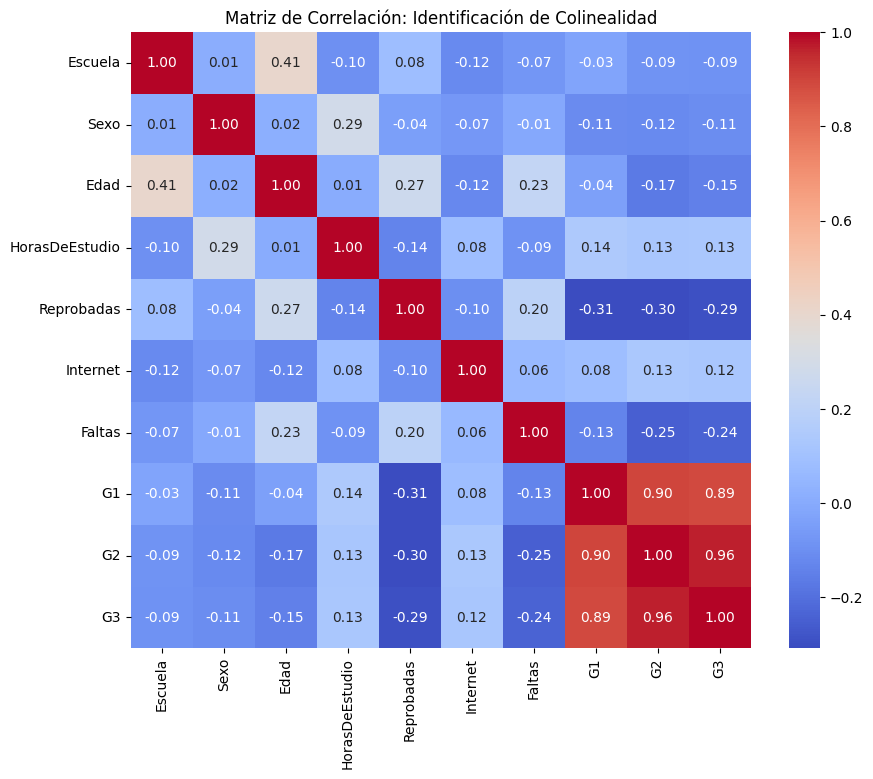

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('A1.3 Calificaciones.csv')
df_clean = df[(df['Faltas'] <= 20) & (df['G3'] > 0)].copy()

df_clean['Escuela'] = df_clean['Escuela'].map({'GP': 0, 'MS': 1})
df_clean['Internet'] = df_clean['Internet'].map({'no': 0, 'yes': 1})
df_clean['Sexo'] = df_clean['Sexo'].map({'M': 0, 'F': 1})

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Identificación de Colinealidad')
plt.show()

### **Selección de características**

Para construir un modelo que sea preciso e interpretable, se realizó un proceso de selección basado en la relevancia estadística basada en la matriz de correlacion entre variables previamente generada. A partir de esto se pudo observar que no todas las variables originales aportan información útil, algunas son redundantes y otras no muestran una relación clara con el desempeño académico.

Se aplicaron tres criterios principales para decidir qué variables incluir:
- Poder predictivo: Variables con una correlación lineal significativa con la calificación final (G3).
- No redundancia: Eliminación de variables que explican lo mismo.
- Valor informativo: Inclusión de factores sociales, demográficos y de comportamiento que permiten entender el contexto del estudiante.

El modelo final se entrenará utilizando las siguientes variables:
- G2: Es el predictor más fuerte. Su alta correlación con G3 indica que el rendimiento reciente es el mejor indicador del resultado final.
- Materias Reprobadas: Se incluye como un indicador de riesgo. Históricamente, el número de materias fallidas influye en la confianza y el desempeño actual del alumno.
- Horas de Estudio: Aporta información sobre la disciplina y el esfuerzo dedicado.
- Faltas: Tras la limpieza de valores atípicos, las ausencias reflejan el nivel de compromiso y continuidad del estudiante en el curso.
- Internet: Se decidió conservar esta variable para evaluar el impacto de la brecha digital en el rendimiento, permitiendo observar si el acceso a recursos tecnológicos influye positivamente, incluso si su correlación inicial es baja.

La variable G1 fue eliminada debido a su redundancia con G2. Al estar altamente correlacionadas entre sí, incluir ambas causaría inestabilidad en los coeficientes del modelo. Tambien se descartaron variables como Edad, Sexo y Escuela, ya que no mostraron una relación suficiente para justificar la complejidad que agregaran en este modelo específico.

### **Entrenamiento y evaluación del modelo**

En esta fase, se construyó y validó el modelo de regresión lineal múltiple para predecir la calificación final (G3). El proceso se dividió en dos etapas críticas para asegurar la validez de los resultados.

**División de datos y prevención de fuga (Data Leakage)**

Para evitar que el modelo "memorizara" los datos en lugar de aprender patrones, se aplicó una división técnica:
- Conjunto de entrenamiento (80%): Datos utilizados para ajustar los coeficientes del modelo.
- Conjunto de prueba (20%): Datos reservados para evaluar el desempeño con información "desconocida".
- Prevención de fuga de datos: Se garantizó que ninguna información del conjunto de prueba influyera en el entrenamiento.
Al separar los datos antes de ajustar el modelo y utilizar únicamente variables disponibles durante el curso (como notas parciales y asistencia), se evitó que el modelo tuviera acceso a información del futuro o del resultado final.

**Desempeño en Entrenamiento y Prueba**
Los resultados muestran la capacidad del modelo para explicar la variabilidad de las notas:
- Resultados de Entrenamiento: El modelo alcanzó un $R^2$ de [0.932], lo que indica un ajuste sólido a los datos históricos. El resumen estadístico (OLS) confirmó que la variable G2 es la mas significativa ($P < 0.05$).
- Resultados de Prueba: Al aplicar el modelo al conjunto de prueba, se obtuvo un $R^2$ de [0.9264] y un Error Cuadrático Medio (MSE) de [0.7564]. La similitud entre ambos $R^2$ demuestra que el modelo tiene una excelente capacidad de generalización.

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Preparación de variables
X = sm.add_constant(df_clean[['G2', 'Reprobadas', 'HorasDeEstudio', 'Faltas', 'Internet']])
y = df_clean['G3']

# 2. División de datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. FASE DE ENTRENAMIENTO
# El modelo aprende de estos datos
modelo_entrenamiento = sm.OLS(y_train, X_train).fit()

print("--- 1. DESEMPEÑO EN ENTRENAMIENTO ---")
print(f"R² (Entrenamiento): {modelo_entrenamiento.rsquared:.4f}")
print(modelo_entrenamiento.summary())

# 4. FASE DE PRUEBA (TEST)
# Evaluamos qué tan bueno es prediciendo datos que nunca vio
y_pred_test = modelo_entrenamiento.predict(X_test)

# Métricas para la fase de prueba
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("\n--- 2. DESEMPEÑO EN PRUEBA (TEST) ---")
print(f"R² (Prueba): {r2_test:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse_test:.4f}")

--- 1. DESEMPEÑO EN ENTRENAMIENTO ---
R² (Entrenamiento): 0.9321
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     732.6
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          1.29e-153
Time:                        19:26:25   Log-Likelihood:                -336.46
No. Observations:                 273   AIC:                             684.9
Df Residuals:                     267   BIC:                             706.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

###**Reflexión y conclusiones**

El modelo es muy preciso porque sus predicciones fallan por menos de un punto en promedio (el MSE de 0.75) y tiene un puntaje de confianza casi idéntico tanto en el entrenamiento como en la prueba (alrededor del 93%), lo que demuestra que no se memorizó los datos, sino que realmente aprendió a predecir. Sin embargo, al observar los detalles, nos damos cuenta de que la calificación del segundo parcial (G2) es la que hace casi todo el trabajo, mientras que variables como las Faltas o tener Internet no cambian mucho el resultado final en este grupo específico. Esto nos sugiere que el camino que lleva el estudiante a mitad del curso es el indicador más fuerte de su éxito final, dejando a las otras variables en un segundo plano estadísticamente. Aunque el modelo es muy preciso, la solución de problemas en ciencia de datos también implica reconocer que algunas variables (como Internet o Horas de Estudio) no siempre tienen el impacto esperado cuando ya existe un historial académico fuerte como el de G2.

###**Referencias**
- Martínez Torteya, A. (s.f.). C1.4 Selección de características [Diapositivas de PowerPoint].
- Martínez Torteya, A. (s.f.). C1.5 Solución de Problemas [Diapositivas de PowerPoint].
- Google Gemini. (2026). Asistente de Inteligencia Artificial para el análisis de datos (Versión Gemini 3 Flash) [Modelo de lenguaje extenso]. Recuperado de https://gemini.google.com